<h1>Movie Trends Over Time: A Short History</h1>
<h3>by: James Trauger, Pushkar Bhargiri, Sid Su</h3>
<h2>Originally Published: May 12, 2023 | Last Edited Jun. 12, 2024</h2>

Movies have existed for well over a century. But in that time they have evolved
and changed greatly. In this project, we are looking through various movie
trends and what has changed over the years. We used various Python tools and
libraries to give us more information about our data.

In [123]:
# basic imports
import requests
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# so things render correctly
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8');

# basic imports
plt.rcParams["figure.figsize"]= (12, 9)

## Step 1: Data Collection

We start by collecting some data from IMDB. We have two data sets that we want
to use:

- **basic movie information** (title.basics.tsv.gz)

  Provides general information about our movies such as runtime, year, genre,
  etc.

- **ratings** (title.ratings.tsv.gz)

  Provide the average movie rating on a scale of 1 to 10 and number of votes
  per rating.
  
We request and download this data using the `requests` library, then write it
to our directory using Python's built-in write function.

In [124]:
# downloading the data. These are datasets provided for non-commercial use
# url= 'https://datasets.imdbws.com/title.basics.tsv.gz';
# url2= 'https://datasets.imdbws.com/title.ratings.tsv.gz';

# titledata= requests.get(url);
# ratingdata= requests.get(url2);

title_filename= 'title_data.tsv.gz';
ratings_filename= 'ratings.tsv.gz';

# write the files to our directory
# open(title_filename, 'wb').write(titledata.content);
# open(ratings_filename, 'wb').write(ratingdata.content);

In [125]:
# reading the data into panda dataframes
title_df= pd.read_csv(title_filename, sep="\t", compression="gzip",
                                      dtype={'isAdult': str});
ratings_df= pd.read_csv(ratings_filename, sep="\t", compression="gzip");

print(title_df.head(5), ratings_df.head(5))

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short         tconst  averageRating  numVotes
0  tt0000001            5.7      1971
1  tt0000002            5.8       263
2  tt0000003   

In [126]:
# reading basics and raties data into panda dataframes
title_df= pd.read_csv(title_filename, sep="\t",
                                                  dtype={'isAdult': str});
ratings_df= pd.read_csv(ratings_filename, sep="\t");
print(title_df.head(5), ratings_df.head(5))

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short         tconst  averageRating  numVotes
0  tt0000001            5.7      1971
1  tt0000002            5.8       263
2  tt0000003   

We are also interested in movies' box office, or how much a movie makes over
the course of their theatrical run. This will help us get a better idea of what
factors affect the box office success of a movie.

Most box office data sets are private or paid, so we collect the data using
data scraping. We employ a similar process to our data collection above except
we iterate through 200 ranks at a time to scrape the data.

In [127]:
# Collect box office data
box_office_url= 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/';
box_office_url= box_office_url + '?offset=';
box_office_df= pd.DataFrame();

# iterate over each webpage 200 ranks at a time
for i in range(0, 1000, 200):
    # append the offset to the url
    box_req= requests.get(box_office_url + str(i));
    soup= BeautifulSoup(box_req.content, 'html.parser');

    # add the next 200 ranks to the current 
    box_office_df = pd.concat([box_office_df,
                               pd.read_html(io=str(soup.find('table')))[0]])
    
# Rename the 'Title' column to 'primaryTitle' to merge with the other dataframe
box_office_df.rename(columns={'Title': 'primaryTitle'},inplace=True)

box_office_df.head(10)

Rank                                primaryTitle Worldwide Lifetime Gross  \
0     1                                      Avatar           $2,923,706,026   
1     2                           Avengers: Endgame           $2,799,439,100   
2     3                    Avatar: The Way of Water           $2,320,250,281   
3     4                                     Titanic           $2,264,750,694   
4     5  Star Wars: Episode VII - The Force Awakens           $2,071,310,218   
5     6                      Avengers: Infinity War           $2,052,415,039   
6     7                     Spider-Man: No Way Home           $1,922,598,800   
7     8                              Jurassic World           $1,671,537,444   
8     9                               The Lion King           $1,663,079,059   
9    10                                The Avengers           $1,520,538,536   

  Domestic Lifetime Gross Domestic % Foreign Lifetime Gross Foreign %  Year  
0            $785,221,649      26.9%         $2,138,484,377     73.1%  2009  
1            $858,373,000      30.7%         $1,941,066,100     69.3%  2019  
2            $684,075,767      29.5%         $1,636,174,514     70.5%  2022  
3            $674,292,608      29.8%         $1,590,458,086     70.2%  1997  
4            $936,662,225      45.2%         $1,134,647,993     54.8%  2015  
5            $678,815,482      33.1%         $1,373,599,557     66.9%  2018  
6            $814,866,759      42.4%         $1,107,732,041     57.6%  2021  
7            $653,406,625      39.1%         $1,018,130,819     60.9%  2015  
8            $543,638,043      32.7%         $1,119,441,016     67.3%  2019  
9            $623,357,910        41%           $897,180,626       59%  2012

In [128]:
# Write data out to csv, so the results are reproducable
box_office_df.to_csv("./box_office.tsv", sep= "\t")

We have taken our data and put it into a dataframe. We used the pandas library
to read it in. Pandas is an extremely powerful library. We use it above to read
in a csv file (in this case a tsv file), but it can be used for many more
sitautions. Refer to the API Reference page
(https://pandas.pydata.org/docs/reference/) for full details.

## Step 2: Data Processing

Now we join our "basic movie information" and "ratings" data into one
dataframe. This allows us to easily compare the data across both files. We are
able to use inner join and use 'tconst'.

'tconst' is a unique identifier for each piece of media making it very easy for
us to join the two tables. To learn more about joins visit
https://pandas.pydata.org/docs/user_guide/merging.html.

In [129]:
# Merge title and rating data, and remove unnecessary columns
df= pd.merge(left=title_df, right=ratings_df, on='tconst', how='inner');

# used in shows; not relevant in this analysis
df.drop(labels=['endYear'],axis=1, inplace=True);

df.head(5)

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear runtimeMinutes                    genres  averageRating  \
0       0      1894              1         Documentary,Short            5.7   
1       0      1892              5           Animation,Short            5.8   
2       0      1892              4  Animation,Comedy,Romance            6.5   
3       0      1892             12           Animation,Short            5.6   
4       0      1893              1              Comedy,Short            6.2   

   numVotes  
0      1971  
1       263  
2      1817  
3       178  
4      2613

We need to parse certain columns to integers

In [130]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear          object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

We are only interested in movies, but in our dataset there are many different
forms of media.

We can safely drop all other forms of media (short films, shows, ...). We are
analyzing these movies over time thus, so we can also drop any movies without a
release date ('startYear'). Then, we need to convert the release dates from
strings to integers in order to plot them later on.

In [131]:
# keep only movies
df= df[df['titleType'] == 'movie']

# drop movies without a release date
df= df[df['startYear'] != '\\N']

# convert release date from strings to integers
df['startYear']= df['startYear'].apply(int)

In [132]:
# convert to float type
to_number = lambda x: float(x) if x.isdigit() else np.nan

df['runtimeMinutes'] = df['runtimeMinutes'].apply(to_number)

In [133]:
# 1 if isAdult else, if it's any other value (0 or invalid)
function = lambda x: True if x == '1' else False

df['isAdult'] = df['isAdult'].apply(function)

In [134]:
df.head(5)

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
144  tt0000147     movie  The Corbett-Fitzsimmons Fight   
326  tt0000502     movie                       Bohemios   
358  tt0000574     movie    The Story of the Kelly Gang   
366  tt0000591     movie               The Prodigal Son   

                     originalTitle  isAdult  startYear  runtimeMinutes  \
8                       Miss Jerry    False       1894            45.0   
144  The Corbett-Fitzsimmons Fight    False       1897           100.0   
326                       Bohemios    False       1905           100.0   
358    The Story of the Kelly Gang    False       1906            70.0   
366              L'enfant prodigue    False       1907            90.0   

                         genres  averageRating  numVotes  
8                       Romance            5.3       204  
144      Documentary,News,Sport            5.3       469  
326                          \N            4.1        15  
358  Action,Adventure,Biography            6.0       826  
366                       Drama            4.4        20

## Step 3: Exploratory Analysis and Data Vizualization

### Amount of movies

Let's look at how many movies were produced every year. Then we can plot it as
a histogram with each bin counting 5 years worth of data.

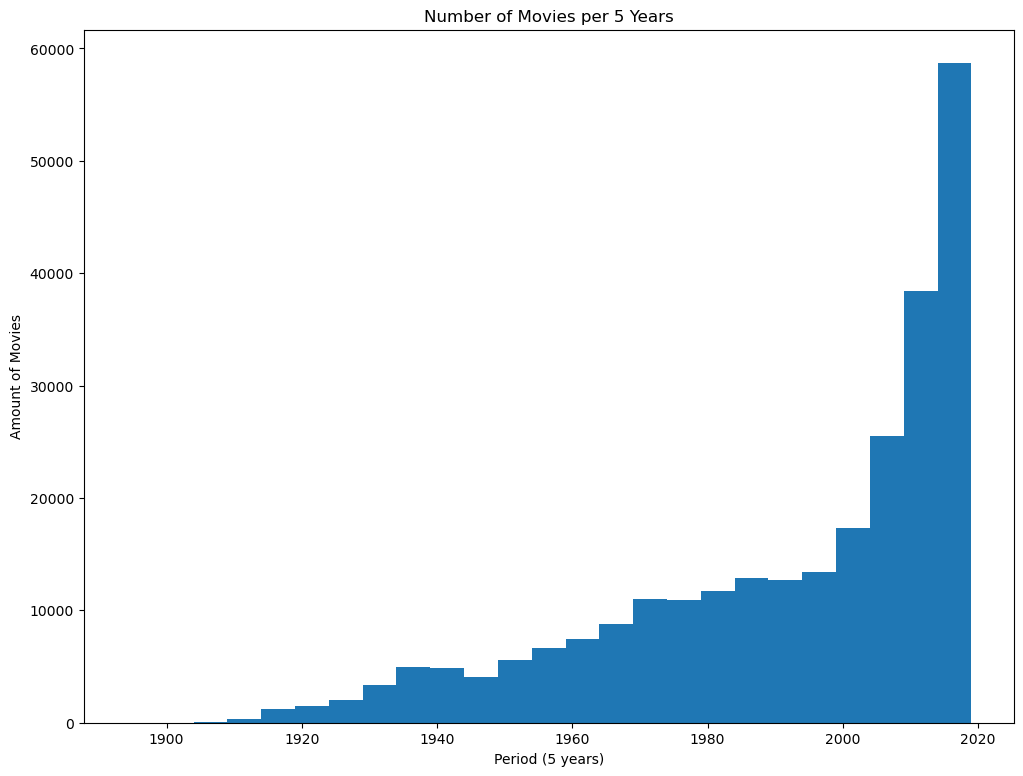

In [135]:
# count of movies for each year
years= df['startYear'];
# create bins of size 5 starting 
bins= np.arange(start=df['startYear'].min(),stop=df['startYear'].max(),step=5);
plt.xlabel('Period (5 years)');
plt.ylabel('Amount of Movies');
plt.title(label='Number of Movies per 5 Years');
plt.hist(x= years, bins=bins);

Observe as time progressed more and more movies were created. From the late
1800s to the late 1910s the camera and filming technology was limited and
expensive, making it difficult to produce movies. As film and storage
technology progressed, the demand to watch those movies also grew causing more
to be produced.

This graph also tells a sad story about film storage. Nitrate film, which was
used in the Silent, Talkie and Golden era of film is highly flamable due to
chemical reactions that release oxygen as it burns. Over 90% of all silent
films have been lost, and 70% of early talkies.

### Runtime

Next, let's look at the runtimes of movies over the years.

In [136]:
# Drop null values and store runtime by year
by_year= df[df['runtimeMinutes'] != '\\N']
by_year = by_year.dropna(axis=0, subset='runtimeMinutes').groupby(by='startYear')

In [137]:
by_year['runtimeMinutes'].head(10)

8          45.0
144       100.0
326       100.0
358        70.0
366        90.0
          ...  
619272     90.0
649109     52.0
734933    120.0
780545     45.0
867340     61.0
Name: runtimeMinutes, Length: 1159, dtype: float64

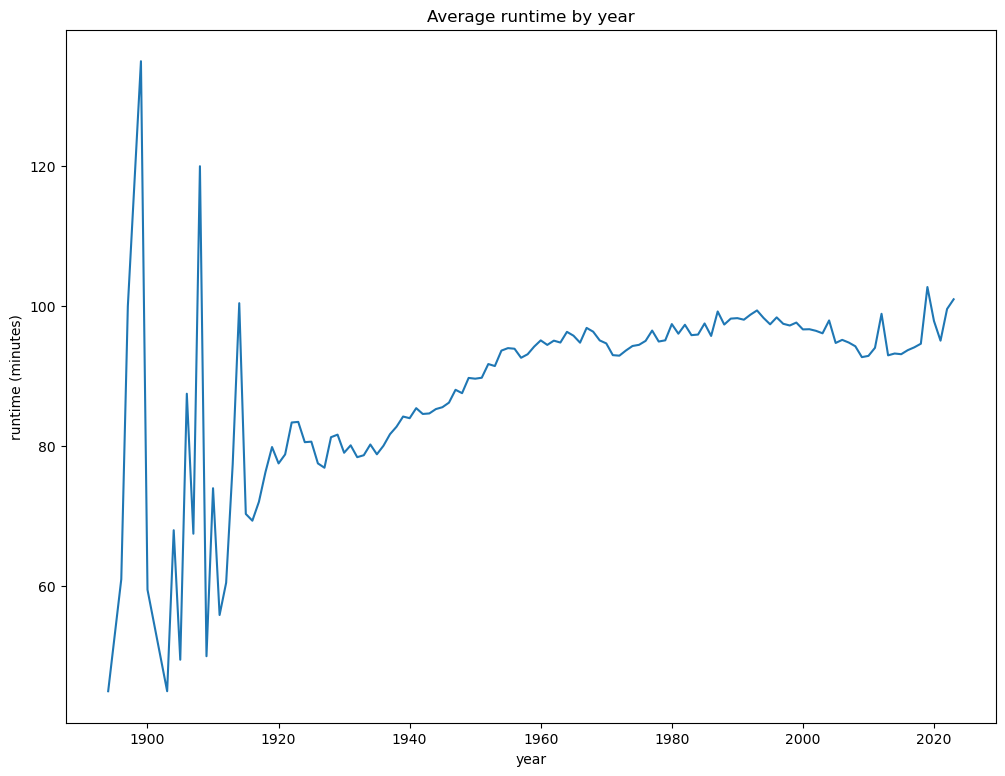

In [138]:
#Find average runtime of each year and plot it

avgs = by_year['runtimeMinutes'].mean();
plt.xlabel('year');
plt.ylabel('runtime (minutes)');
plt.title('Average runtime by year');
plt.plot(avgs);

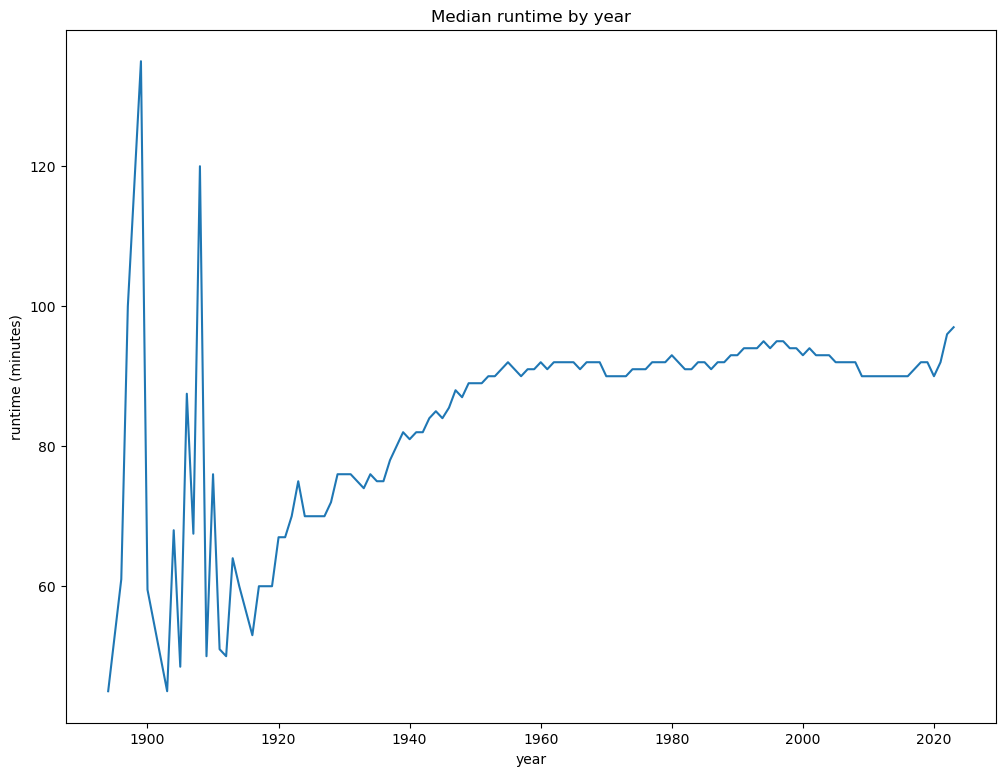

In [139]:
plt.xlabel('year');
plt.ylabel('runtime (minutes)');
plt.title('Median runtime by year');
plt.plot(by_year['runtimeMinutes'].median());

The average and median runtimes of movies has a clear positive trend initially
and flattened out to about 90 minutes. Similar to the quantity of movies, it
could be that movies grew in length partially due to better technology until
moviemakers decided 90 minutes is a good balance of time to both tell a
complete story and keep the audience's attention.

Note that in the early 20th century, there were few movies being made per year
so average runtime was much more sensitive to outliers. As more movies were
produced, the runtime stabilized and followed a trend over the years.

### Genres

Now let us take a look at the various genres of movies made over time. 

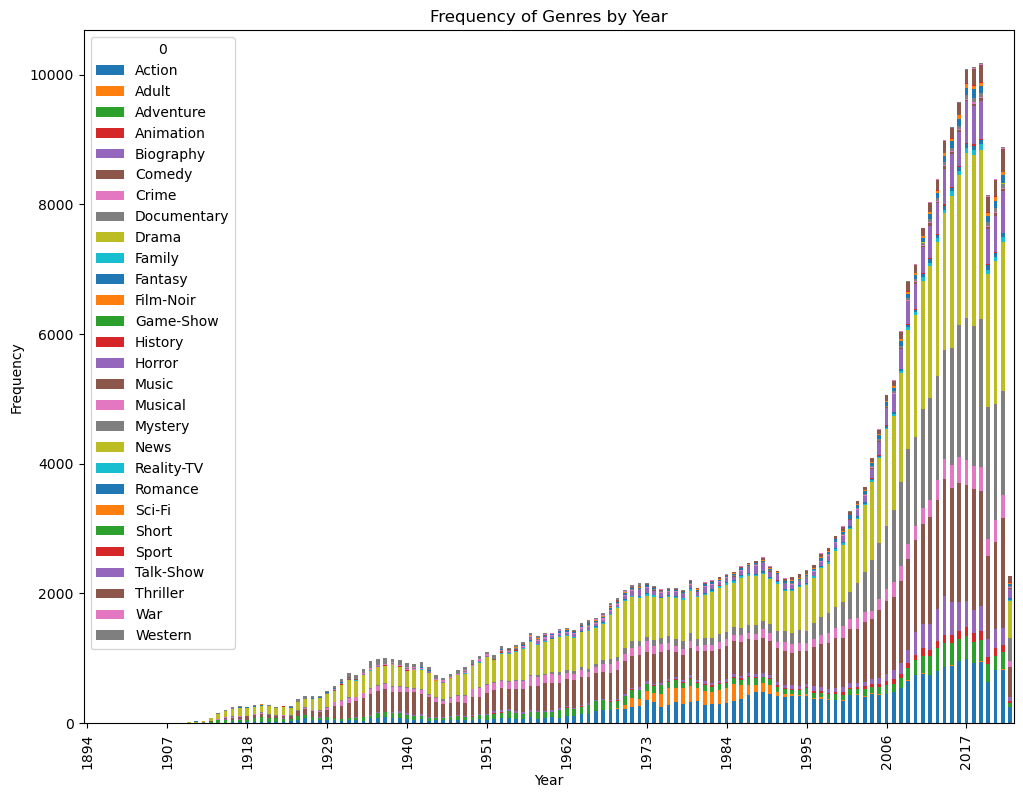

In [140]:
#This block is looking at the frequency of genre over time
#The first step is to split a data cell of a movie with multiple genres into separate cells
genre = df['genres'].str.split(",", n=2, expand = True)
#Then we add in year into our new dataframe
genre.insert(3, "year", df['startYear'], True)
#We delete NaN and Null values
genre = genre[genre[0] != '\\N']
#We drop the secondary and tertiary genres as we are only looking at the primary genre
genre.drop([1, 2], axis=1)
#We then group the genre by year and put it in a data frame
genre_tot = genre[[0, 'year']].groupby('year')[0].value_counts().reset_index(name='count')
#Now we plot our data in a stacked bar graph
genre.groupby(['year', 0]).size().unstack().plot.bar(stacked=True, figsize=(12, 9));
#We set 12 x ticks
plt.locator_params(axis='x', nbins=12);
#We label our graph
plt.xlabel("Year");
plt.ylabel("Frequency");
plt.title("Frequency of Genres by Year");

In this block, we separated the genres and found a count of them for each year.
We then used that data to plot a stacked bar chart. The bar chart function
allows a number of arguments allowing advanced pandas users to have great
customizability. For more details specifically about stacked bar charts visit
https://www.statology.org/pandas-stacked-bar-chart/.

Here we had to first clean up the genre cells. These cells oftentimes had
multiple genres listed with a comma separating each genre. We separated the
genres and looked at primary genres to keep all movies on an even playing
field.

The graph shows how the quantity of movies has grown. One genre that peaked in
the 21st century is comedies. Action movies also grew from the mid 20th century
onwards. Dramas and documentaries followed a similar path growing over time as
well. Musicals have stayed relatively stagnant as other genres have grown. This
may be because the overall audience for musicals is still quite nitche, and the
industry can only support so many musicals with good storytelling along with
musical composition. As it has become a lot easier to write and produce small
budget movies of other genres with new and better technology, writing a musical
remains a tough task.

In [141]:
df.sort_values(by=['numVotes'], ascending=False).head(10)

tconst titleType  \
82557   tt0111161     movie   
250364  tt0468569     movie   
637745  tt1375666     movie   
99043   tt0137523     movie   
81462   tt0109830     movie   
82340   tt0110912     movie   
96895   tt0133093     movie   
90341   tt0120737     movie   
46210   tt0068646     movie   
395446  tt0816692     movie   

                                             primaryTitle  \
82557                            The Shawshank Redemption   
250364                                    The Dark Knight   
637745                                          Inception   
99043                                          Fight Club   
81462                                        Forrest Gump   
82340                                        Pulp Fiction   
96895                                          The Matrix   
90341   The Lord of the Rings: The Fellowship of the Ring   
46210                                       The Godfather   
395446                                       Interstellar   

                                            originalTitle  isAdult  startYear  \
82557                            The Shawshank Redemption    False       1994   
250364                                    The Dark Knight    False       2008   
637745                                          Inception    False       2010   
99043                                          Fight Club    False       1999   
81462                                        Forrest Gump    False       1994   
82340                                        Pulp Fiction    False       1994   
96895                                          The Matrix    False       1999   
90341   The Lord of the Rings: The Fellowship of the Ring    False       2001   
46210                                       The Godfather    False       1972   
395446                                       Interstellar    False       2014   

        runtimeMinutes                   genres  averageRating  numVotes  
82557            142.0                    Drama            9.3   2737560  
250364           152.0       Action,Crime,Drama            9.0   2710629  
637745           148.0  Action,Adventure,Sci-Fi            8.8   2406192  
99043            139.0                    Drama            8.8   2179773  
81462            142.0            Drama,Romance            8.8   2130268  
82340            154.0              Crime,Drama            8.9   2103714  
96895            136.0            Action,Sci-Fi            8.7   1952760  
90341            178.0   Action,Adventure,Drama            8.8   1911387  
46210            175.0              Crime,Drama            9.2   1903690  
395446           169.0   Adventure,Drama,Sci-Fi            8.6   1901627

<b>Are films getting better or worse as time goes by?</b>

Average each year's rating, and graph

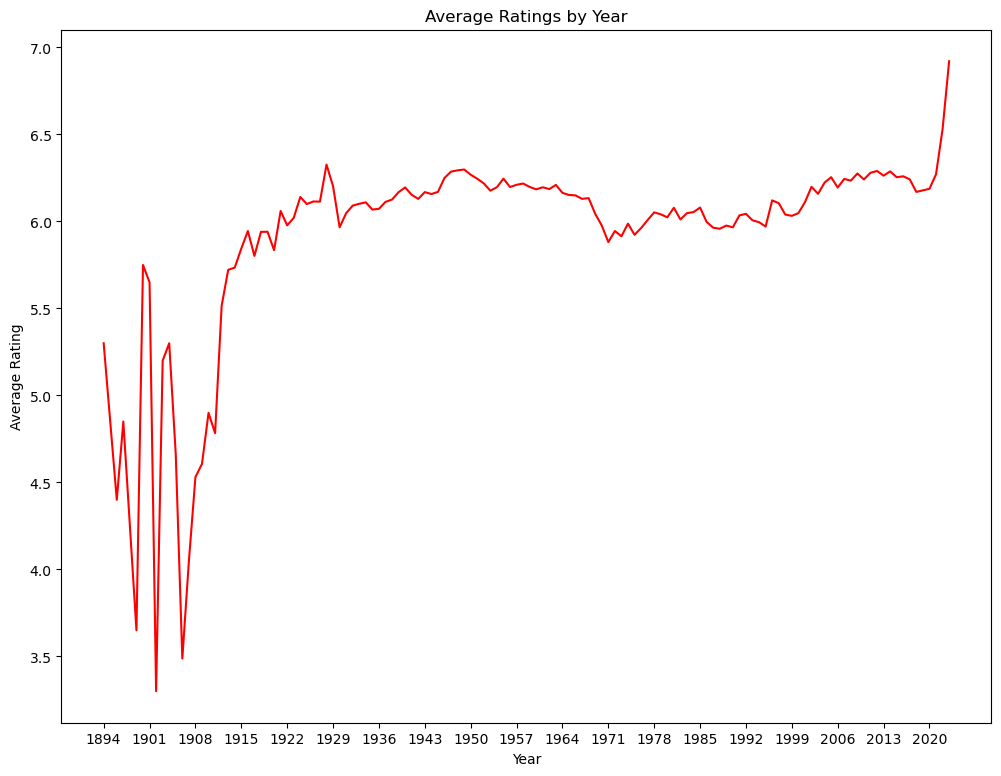

In [142]:
# convert the ratings to floats to make analysis easier
df_avg_rating= df.groupby(by= 'startYear')['averageRating'].mean();
df_avg_rating.plot.line(x= 'startingYear', y= 'averageRating',
                        xlabel= 'Year', ylabel= 'Average Rating',
                        title= 'Average Ratings by Year', color= 'red',
                        xticks= range(1894, 2023, 7), figsize= (12, 9));

We can see a trend that after the early years with very few films, the average
rating stabilizes. Interestingly, between the mid-60s and early 2000s, there is
a dip in the average rating of films. What is odd is the sudden spike in recent
years. This could be explained by
<a href="https://deadline.com/2020/03/vin-diesel-bloodshot-i-still-believe-the-hunt-weekend-box-office-coronavirus-1202882333">
  how few films came out during the pandemic
</a>, so critics were happy to have anything. It will be interesting to see
where this trend goes over time now that the pandemic is mostly over.

However, this is a bit muddied, since many movies have few ratings. If we only
take movies with >50 ratings (the Rotten Tomatoes criteria for rating listing
and ranking), then we get different results.

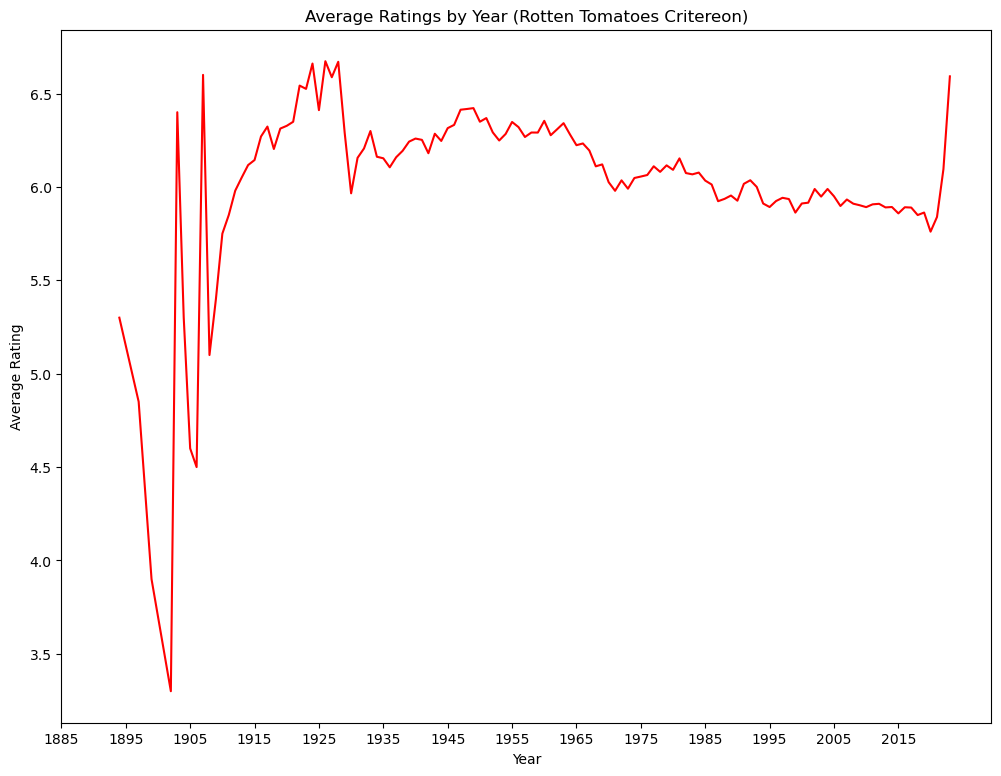

In [143]:
# convert the ratings to floats to make analysis easier
df_avg_rating2= df[df['numVotes'] >= 50]
df_avg_rating2= df_avg_rating2.groupby(by= 'startYear')['averageRating'].mean();

df_avg_rating2.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9), xlabel= 'Year', ylabel= 'Average Rating', \
                        color= 'red', title= 'Average Ratings by Year (Rotten Tomatoes Critereon)', xticks= range(1885, 2023, 10));

By cutting films with fewer than 50 ratings, we can see that ratings after
roughly 1929 appear to go down in quality. As some inital hypotheses, the Great
Depression could have led to more, but lower quality films being produced,
lowering the average. We cannot yet extrapolate that films are getting worse,
because it could be that simply more films are being made. In this way the
trend towards lower ratings could represent a democratization of filmmaking, at
the cost of some SharkNados getting through.

<b>Do critics have an appetite for mature themes?</b>

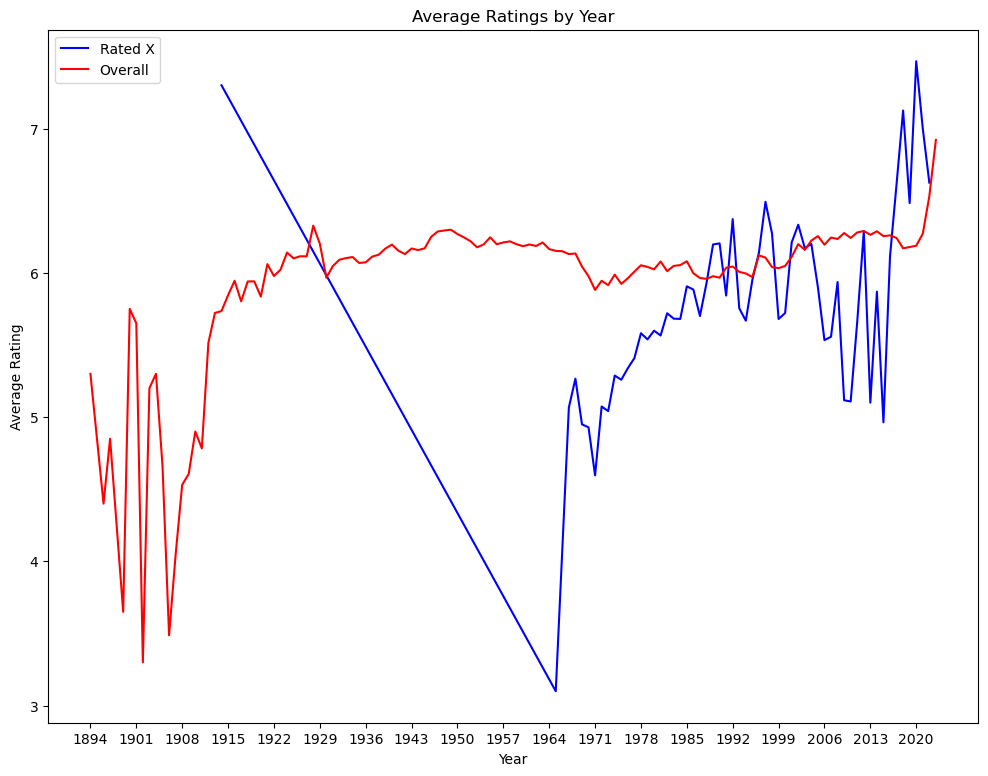

In [144]:
df_avg_rating= df.groupby(by= 'startYear')['averageRating'].mean();
df_rated_x= df[df['isAdult'] == True].groupby(by= 'startYear')['averageRating'].mean();
df_rated_x.plot.line(x= 'startingYear', y= 'averageRating', figsize= (12, 9),
                     xlabel= 'Year', ylabel= 'Average Rating',
                     color= 'blue',
                     label= 'Rated X', title= 'Average Ratings by Year',
                     xticks= range(1894, 2023, 7));
df_avg_rating.plot.line(x= 'startingYear', y= 'averageRating',
                        figsize= (12, 9),
                        xlabel= 'Year', ylabel= 'Average Rating',
                        color= 'red', label= 'Overall',
                        title= 'Average Ratings by Year',
                        xticks= range(1894, 2023, 7));

plt.legend();

This plot tells a story about censorship in the US. The gap between 1914 and
1964 represents the years where Hays Code were active, and thus Rated X movies
and their themes were not allowed. Interestingly, Hays code came into effect
1934, so it may also be in part due to incomplete iMDB data. Incomplete data
also tells a story about how over 90% of silent films and over 70% of films
from both the silent to early talkie era have been lost.

As the 60s and 70s went on, X rated films reviewed better coinciding with the
sexual liberation movement or sexual revolution. Additionally, crime movies
with extreme violence gained prominence, spurred on by the commercially
successful and critically acclaimed film, The Godfather (1972).

### Amount of movies

Let's look at how many movies were produced every year. Then we can plot it as
a histogram with each bin counting 5 years worth of data.

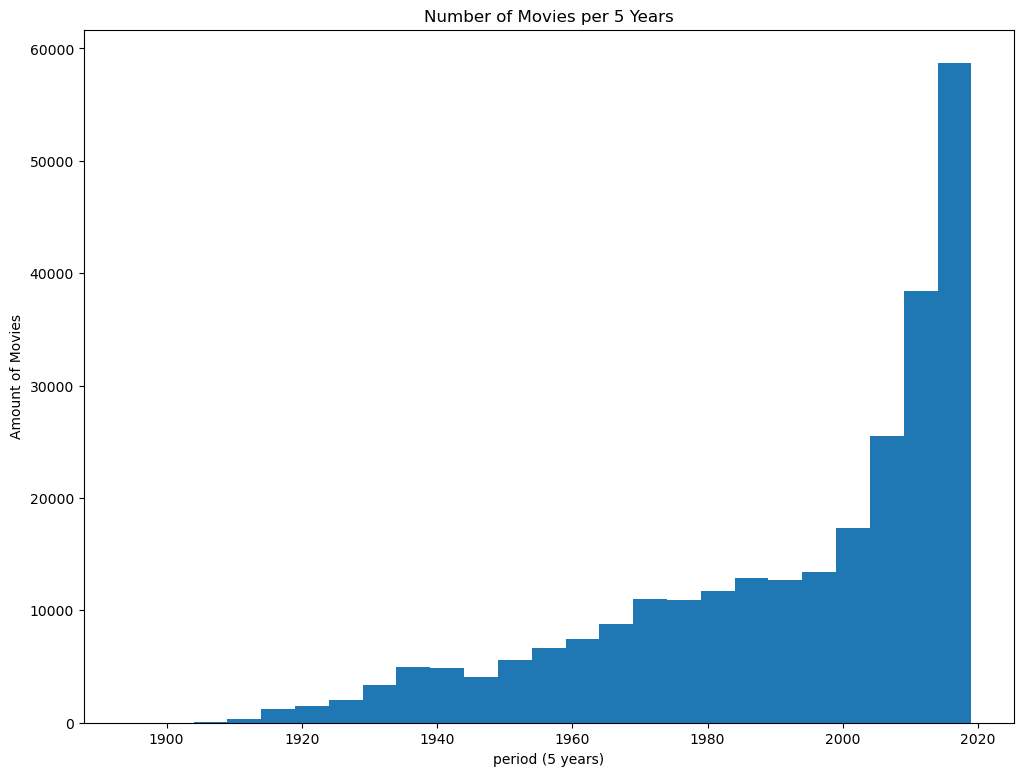

In [145]:
# count of movies for each year
years = df['startYear']

# create bins of size 5 starting 
bins = np.arange(start=df['startYear'].min(),stop=df['startYear'].max(),step=5)

plt.xlabel('period (5 years)');
plt.ylabel('Amount of Movies');
plt.title(label='Number of Movies per 5 Years');
plt.hist(x=years,bins=bins);

Observe as time progressed more and more movies were created. From the late
1800s to the late 1910s the camera and filming technology was limited and
expensive, making it difficult to produce movies. As film and storage
technology progressed, the demand to watch those movies also grew causing more
to be produced. This continued at a roughly constant upwards trend with film
manufacturing techniques by Kodak and Fujifilm gradually bringing down the
price of film. In the 2000s however, the digital revolution greatly reduced the
price of filming due to reusable media and easier tools for editing films,
adding effects and recording sound.

This graph also tells a sad story about film storage. Nitrate film, which was
used in the Silent, Talkie and Golden era of film is highly flammable due to
chemical reactions that release oxygen as it burns. Over 90% of all silent
films have been lost, and 70% of early talkies.

### Runtime

Next, let's look at the runtimes of movies over the years.

In [146]:
by_year = df.dropna(axis=0,subset='runtimeMinutes').groupby(by='startYear')

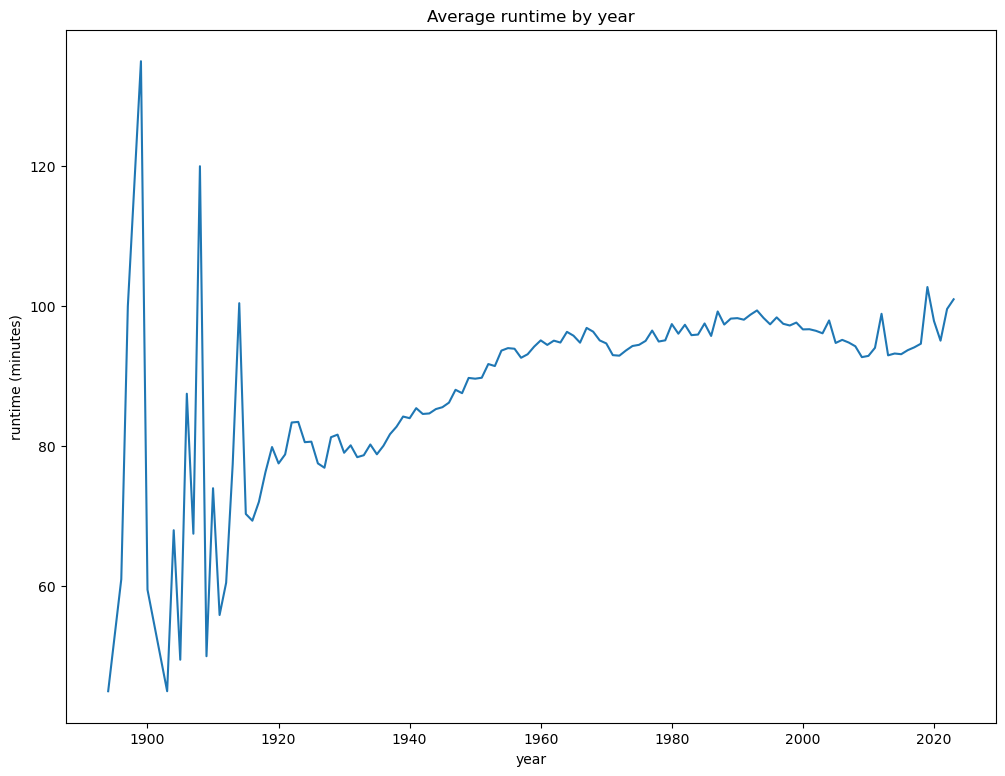

In [147]:
avgs = by_year['runtimeMinutes'].mean();

plt.xlabel('year');
plt.ylabel('runtime (minutes)');
plt.title('Average runtime by year');
plt.plot(avgs);

How will the median runtime fair?

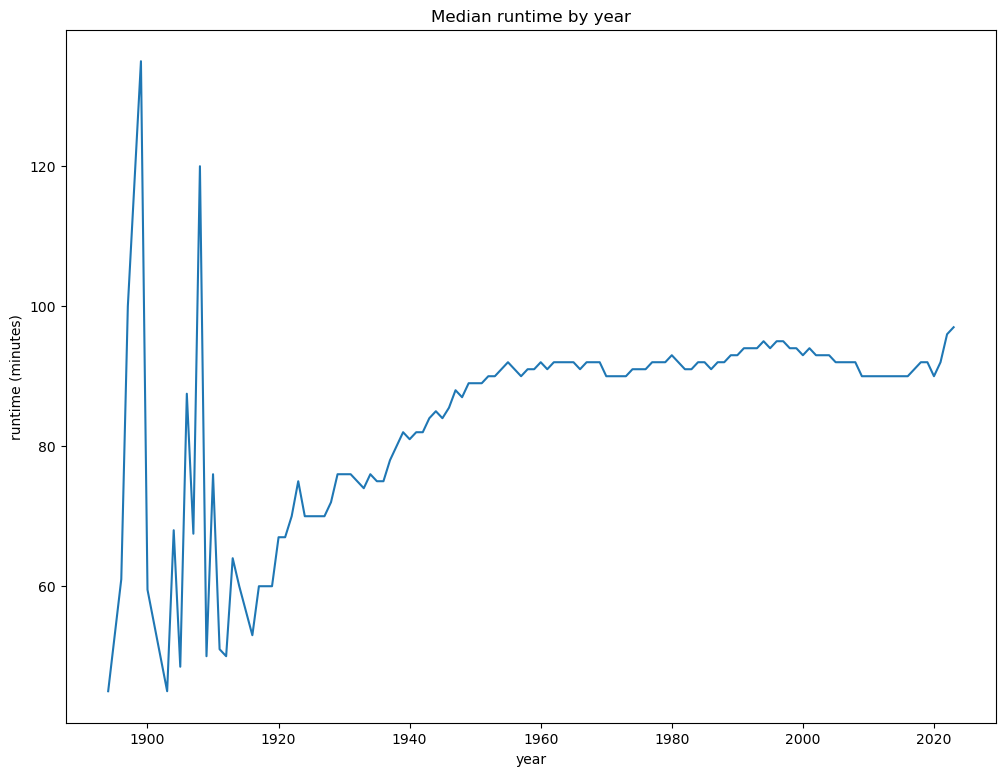

In [148]:
plt.xlabel('year')
plt.ylabel('runtime (minutes)')
plt.title('Median runtime by year')

plt.plot(by_year['runtimeMinutes'].median());

In the late 19th century and early 20th century, few movies were produced, so
the graph is sensitive to outliers. The average and median run times of movies
then have a clear positive trend in the early 20th century, coinciding with
manufacturing film and camera manufacturing techniques improving. Then, as more
movies were produced, the run time stabilized. Movie makers decided 90 minutes
is a good balance of time to both tell a complete story and keep the audience's
attention.

### Box office

To see the ratings and genres of the top 1000 box office movies, we need to
merge it with our original dataframe. By performing a 'right' merge we move all
the rating, votes, and genres columns to the box office dataframe. Both
dataframes share a title column that we can use to merge on.

In [149]:
# TODO move to step 2 

# add the averageRatings numVotes, and genres to the box office dataframe
# df would be the 'left' set and box_office_df would be the 'right' set
interested_columns= ['primaryTitle', 'genres',
                     'averageRating', 'numVotes', 'runtimeMinutes'];
boxdf= df[interested_columns].merge(box_office_df,
                                    how='right', on='primaryTitle')

# remove the duplicates of movies with the highest number of votes
boxdf= boxdf.sort_values('numVotes', ascending=False)
boxdf= boxdf.drop_duplicates('primaryTitle')
boxdf= boxdf.sort_values(by='Rank')

boxdf.head(5)

primaryTitle                    genres  \
2                                       Avatar  Action,Adventure,Fantasy   
4                            Avengers: Endgame    Action,Adventure,Drama   
5                     Avatar: The Way of Water  Action,Adventure,Fantasy   
8                                      Titanic             Drama,Romance   
12  Star Wars: Episode VII - The Force Awakens   Action,Adventure,Sci-Fi   

    averageRating   numVotes  runtimeMinutes  Rank Worldwide Lifetime Gross  \
2             7.9  1339903.0           162.0     1           $2,923,706,026   
4             8.4  1174213.0           181.0     2           $2,799,439,100   
5             7.7   375367.0           192.0     3           $2,320,250,281   
8             7.9  1216748.0           194.0     4           $2,264,750,694   
12            7.8   945729.0           138.0     5           $2,071,310,218   

   Domestic Lifetime Gross Domestic % Foreign Lifetime Gross Foreign %  Year  
2             $785,221,649      26.9%         $2,138,484,377     73.1%  2009  
4             $858,373,000      30.7%         $1,941,066,100     69.3%  2019  
5             $684,075,767      29.5%         $1,636,174,514     70.5%  2022  
8             $674,292,608      29.8%         $1,590,458,086     70.2%  1997  
12            $936,662,225      45.2%         $1,134,647,993     54.8%  2015

We need to convert all the currencies to actual numbers for Python to process

In [150]:
# given a dollar amount ($123,456,789), this function removes the currecny symbol 
# then, it parses the comma delimited number.
convert= lambda x: locale.atof(x.strip('$')) if x != '-' else np.nan

# apply this function to each of the revenue columns to convert them to floats
boxdf['Worldwide Lifetime Gross']= boxdf['Worldwide Lifetime Gross'].apply(convert)
boxdf['Domestic Lifetime Gross']= boxdf['Domestic Lifetime Gross'].apply(convert)
boxdf['Foreign Lifetime Gross']= boxdf['Foreign Lifetime Gross'].apply(convert)

boxdf.head(5)

primaryTitle                    genres  \
2                                       Avatar  Action,Adventure,Fantasy   
4                            Avengers: Endgame    Action,Adventure,Drama   
5                     Avatar: The Way of Water  Action,Adventure,Fantasy   
8                                      Titanic             Drama,Romance   
12  Star Wars: Episode VII - The Force Awakens   Action,Adventure,Sci-Fi   

    averageRating   numVotes  runtimeMinutes  Rank  Worldwide Lifetime Gross  \
2             7.9  1339903.0           162.0     1              2.923706e+09   
4             8.4  1174213.0           181.0     2              2.799439e+09   
5             7.7   375367.0           192.0     3              2.320250e+09   
8             7.9  1216748.0           194.0     4              2.264751e+09   
12            7.8   945729.0           138.0     5              2.071310e+09   

    Domestic Lifetime Gross Domestic %  Foreign Lifetime Gross Foreign %  Year  
2               785221649.0      26.9%            2.138484e+09     73.1%  2009  
4               858373000.0      30.7%            1.941066e+09     69.3%  2019  
5               684075767.0      29.5%            1.636175e+09     70.5%  2022  
8               674292608.0      29.8%            1.590458e+09     70.2%  1997  
12              936662225.0      45.2%            1.134648e+09     54.8%  2015

Now let's plot it. We can see the highest grossing movies (> 1.5 billion dollars) have pretty high ratings. However, there are still many movies with average or poor ratings that make lots of money. Just because a movie does well in the box office does not mean it will rate highly.

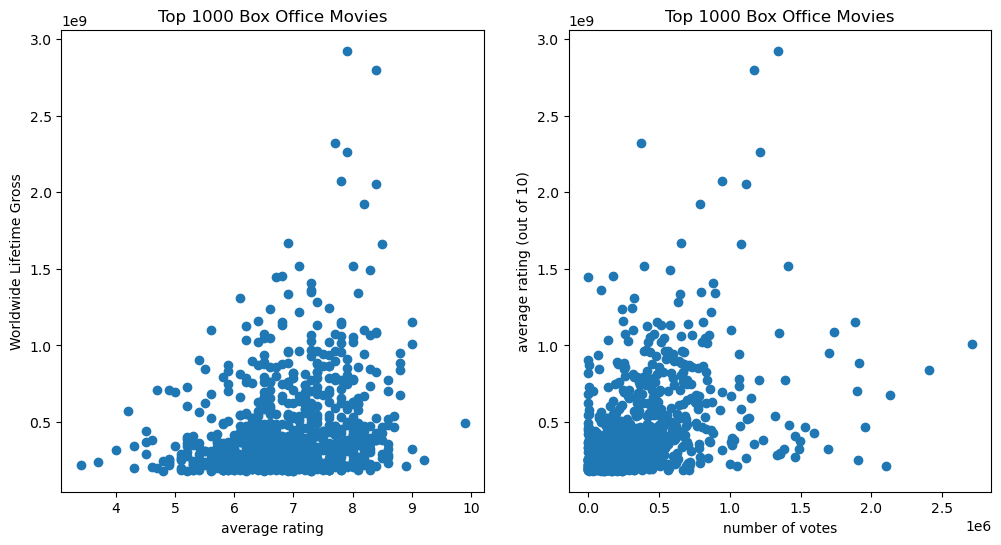

In [151]:
figure, (axis1, axis2)= plt.subplots(1,2)

# plot the top 1000 box office movies
axis1.set_xlabel('average rating')
axis1.set_ylabel('Worldwide Lifetime Gross')
axis1.set_title('Top 1000 Box Office Movies')
axis1.scatter(x=boxdf['averageRating'], y=boxdf['Worldwide Lifetime Gross'])

# plot all movies
axis2.set_xlabel('number of votes')
axis2.set_ylabel('average rating (out of 10)')
axis2.set_title('Top 1000 Box Office Movies')
axis2.scatter(x=boxdf['numVotes'], y=boxdf['Worldwide Lifetime Gross'])

figure.set_size_inches(12,6)
plt.show()

How about runtime? Most of the high grossing movies are between 90 and 150 minutes. 

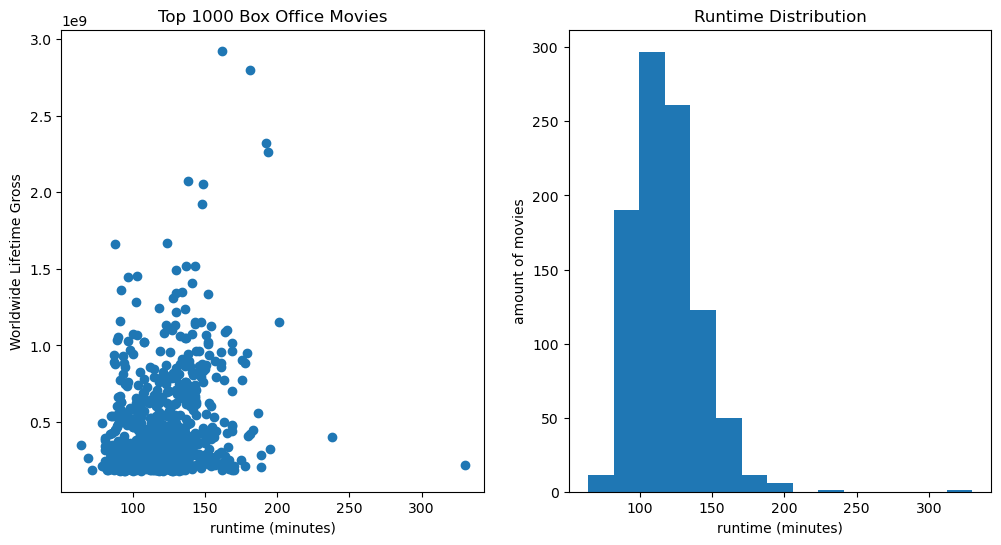

In [152]:
figure, (axis1, axis2)= plt.subplots(1,2)
x= 'runtime (minutes)'

# plot the top 1000 box office movies
axis1.set_xlabel(x)
axis1.set_ylabel('Worldwide Lifetime Gross')
axis1.set_title('Top 1000 Box Office Movies')
axis1.scatter(boxdf['runtimeMinutes'], boxdf['Worldwide Lifetime Gross'])

# plot all movies
axis2.set_xlabel(x)
axis2.set_ylabel('amount of movies')
axis2.set_title('Runtime Distribution')
axis2.hist(boxdf['runtimeMinutes'], bins=15)

figure.set_size_inches(12,6)
plt.show()

## Analysis, Hypothesis Testing, and Machine Learning

Let's first analyze the highest grossing movies that have at least one rating for the viewers

In [153]:
boxdf= boxdf.dropna(how='all',subset='numVotes')
# rename to remove spaces
boxdf= boxdf.rename(columns={'Worldwide Lifetime Gross': 'boxOffice'})
# take a subset of the movies with at least 15,0000 votes
thousand = df[df['numVotes'] > 15000].copy()

There appears to be a logarithmic relationship between the number of votes and
average rating. Both the 1000 highest grossing movies and the entire dataset
show this relationship.

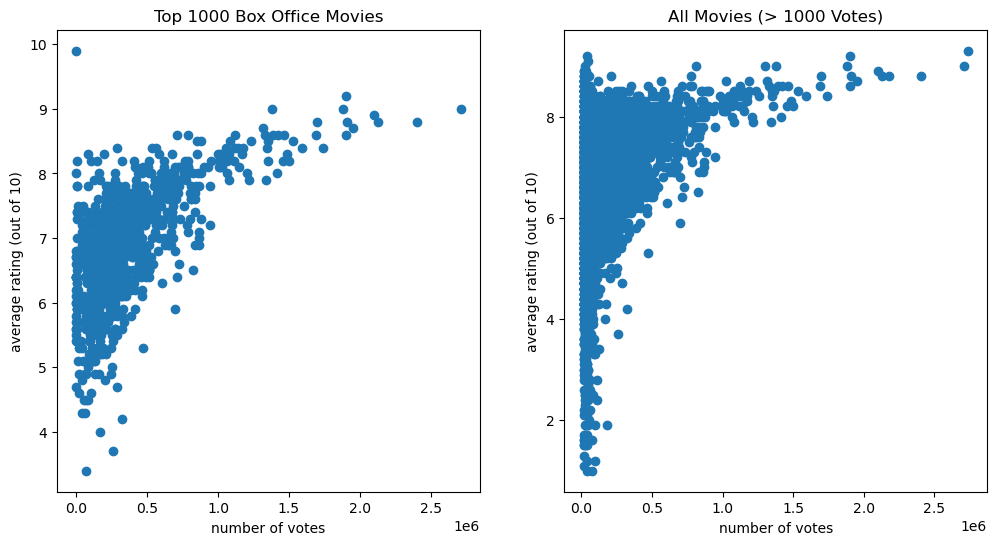

In [154]:
figure, (axis1, axis2)= plt.subplots(1,2)

# plot the top 1000 box office movies
axis1.set_xlabel('number of votes')
axis1.set_ylabel('average rating (out of 10)')
axis1.set_title('Top 1000 Box Office Movies')
axis1.scatter(boxdf['numVotes'], boxdf['averageRating'])

# plot all movies
axis2.set_xlabel('number of votes')
axis2.set_ylabel('average rating (out of 10)')
axis2.set_title('All Movies (> 1000 Votes)')
axis2.scatter(thousand['numVotes'], thousand['averageRating'])

figure.set_size_inches(12,6)
plt.show()

Let's test how a linear regression model will perform. We want to predict the
average rating based on the number of votes. The LinearRegression and
statsmodels libraries have many helpful and easy to use machine learning models
for us to use.

In [155]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula import api as stats

We will be using ordinary least squares regression to fit the number of votes to the average rating.

In [156]:

lin_model= stats.ols(formula='averageRating ~ numVotes', data=thousand).fit()

We can now plot the results. It seems this model is inaccurate as the residuals are not normally distributed. If there was a true linear relationship between the number of votes and rating then the errors in our predictions (residuals) should be normally distributed.

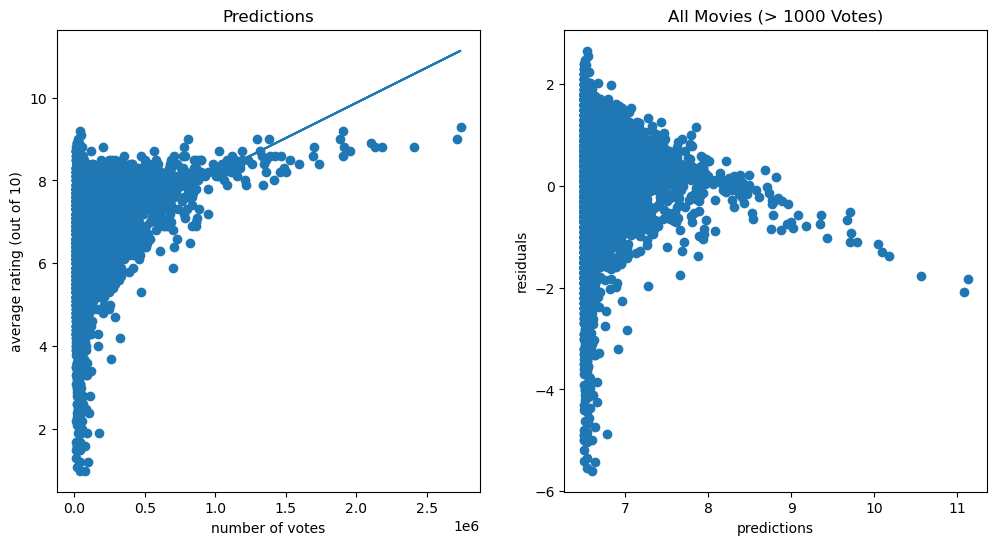

In [157]:
votes= thousand['numVotes']
preds= lin_model.predict(votes)

figure, (axis1, axis2)= plt.subplots(1,2)

# plot the number of votes vs rating with the linear regression model
axis1.set_xlabel('number of votes')
axis1.set_ylabel('average rating (out of 10)')
axis1.set_title('Predictions')
axis1.scatter(x=votes, y=thousand['averageRating'])
axis1.plot(votes, lin_model.predict(votes))

# plot all movies
axis2.set_xlabel('predictions')
axis2.set_ylabel('residuals')
axis2.set_title('All Movies (> 1000 Votes)')
axis2.scatter(x=preds, y=lin_model.resid)

figure.set_size_inches(12,6)
plt.show()

Let's take an exponential transformation of the average rating. As more movies
are rated, it has a lesser impact on the average rating. We start to see
diminshing return for the average rating as the number of votes increases.

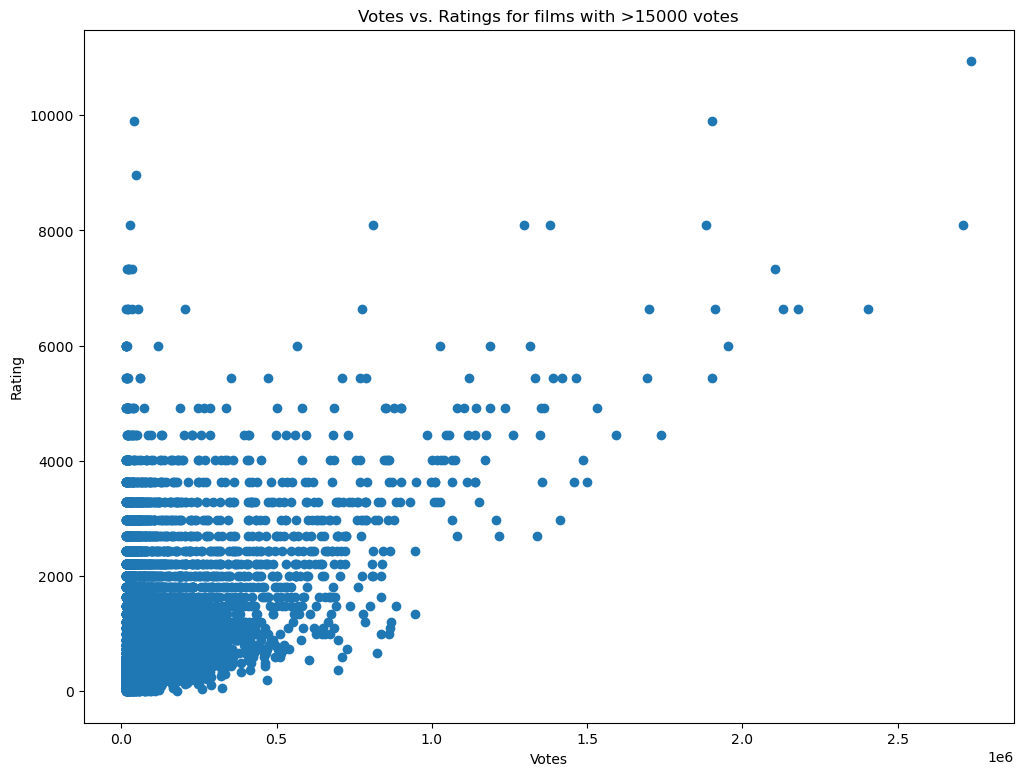

In [158]:
thousand['logRating']= thousand['averageRating'].apply(np.exp);
exp_model= stats.ols(formula='logRating ~ numVotes',data=thousand).fit();
plt.scatter(votes,thousand['logRating']);
plt.xlabel('Votes');
plt.ylabel('Rating');
plt.title('Votes vs. Ratings for films with >15000 votes');

Although we cannot conclude much if we take votes vs ratings directly, if we
limit ourselves to "popular" movies that have >15000 ratings, we see that
popularity and critical acclaim do appear to be correlated. However, we cannot
conclude any causation still, because in the real world votes and rating are
not at all independent. If the highest rated movie tends to win awards, then
this popularity will generate a boost in ticket sales and the amount of people
who could write a rating.

Additionally, a lot of data is removed. We went from millions of data points to
91564, because there are only so many popular films.

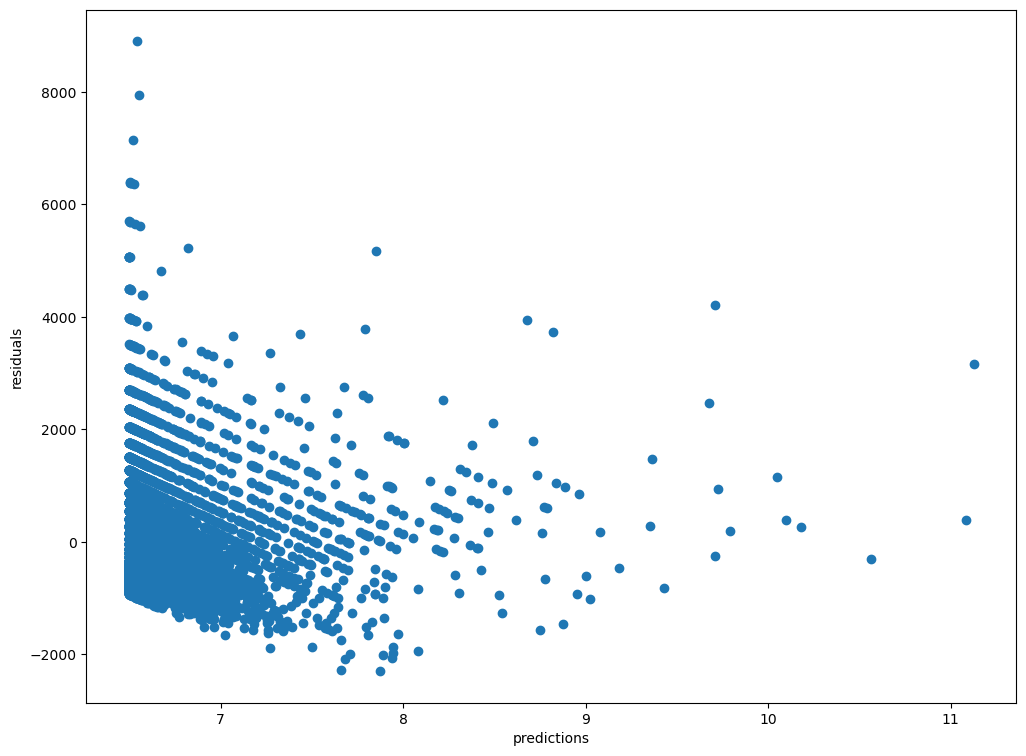

In [159]:
log_preds= exp_model.predict(votes);
plt.xlabel('predictions');
plt.ylabel('residuals');
plt.scatter(preds, exp_model.resid);

Looking at the residual graph for the previous scatter plot, we still see a
high variation among movies with fewer votes. This is could be solved by taking
even rating count threshholds, but doing so would be less an analysis of
popular films, but rather of the best films of all time.

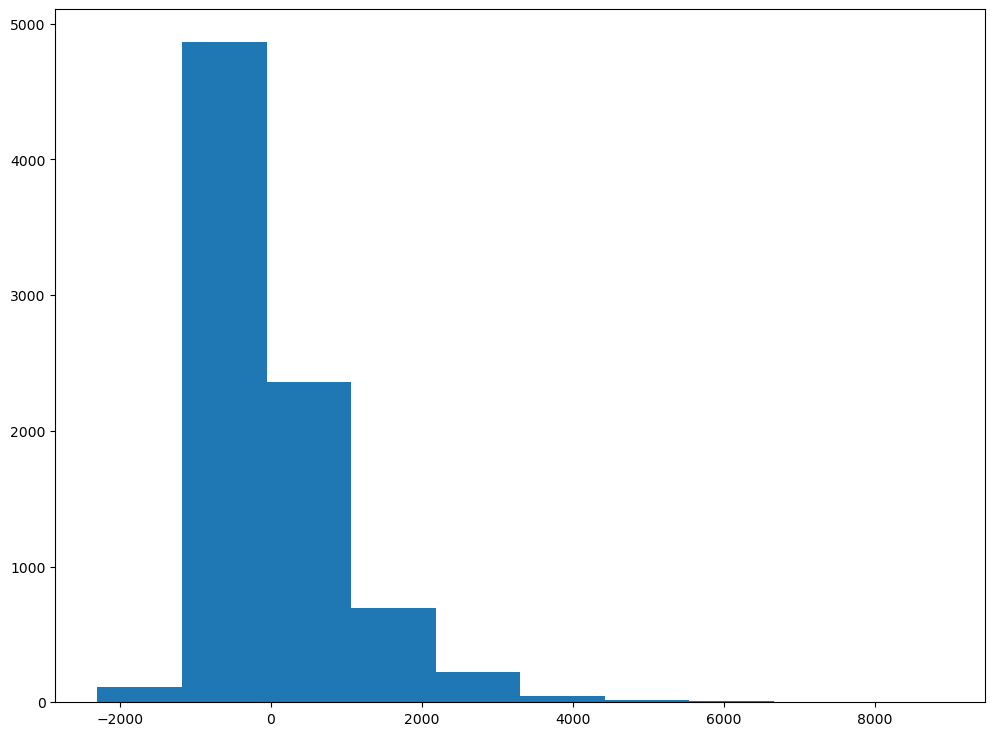

In [160]:
plt.hist(exp_model.resid);

The histogram is right-skewed, which means that many films tend to overperform
better than the number of reviews would suggest.

## Insight and Policy Decision

From this analysis we get a good idea of trends in movie making over time, and
the eras of film. From humble beginnings, film exploded in popularity in the
1920s, and with that popularity audiences clamored for longer experiences, with
more technology. Morality also become a factor, with Hays code preventing X
rated movies from being produced.

The film industry continued to gradually grow. The late 60s saw the end of Hays
code, allowing for more adult themes such as crime and antiheroes.

Then, in the 2000s, the digital revolution democratized film making, allowing
for an explosion of new films to be produced with cheaper and more workable
digital technology. This trend continued until the Coronavirus pandemic led to
fewer films being released, with those being released reviewing extremely well
either due to an audience bored from staying inside all day, or creativity
driven by the pandemic.

In general, more popular films tend to be better. In the future, it appears
that 2023 will see the film industry recover to pre-pandemic levels, and all
genres are growing their audience. It has never been a better time to be a film
maker, and it will be interesting to see what will come out in the future.